<a href="https://colab.research.google.com/github/kumarakhansa/AITF_2026/blob/main/03_DATA_CLEANSING/data_cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARY**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# **LOAD DATASET**

In [43]:
url = "https://raw.githubusercontent.com/kumarakhansa/AITF_2026/refs/heads/main/03_DATA_CLEANSING/dirty_dataset.csv"
df = pd.read_csv(url)

# **DATA UNDERSTANDING**

In [44]:
print("Jumlah data:", df.shape[0])
print("\nTipe data:")
print(df.dtypes)

print("\nJumlah nilai hilang:")
print(df.isnull().sum())

Jumlah data: 20

Tipe data:
Rank                                 int64
Peak                                object
All Time Peak                       object
Actual gross                        object
Adjusted gross (in 2022 dollars)    object
Artist                              object
Tour title                          object
Year(s)                             object
Shows                                int64
Average gross                       object
Ref.                                object
dtype: object

Jumlah nilai hilang:
Rank                                 0
Peak                                11
All Time Peak                       14
Actual gross                         0
Adjusted gross (in 2022 dollars)     0
Artist                               0
Tour title                           0
Year(s)                              0
Shows                                0
Average gross                        0
Ref.                                 0
dtype: int64


# **DATA CLEANING**

In [46]:
# Merapikan nama kolom
df.columns = df.columns.str.replace('\xa0', ' ', regex=False)

In [47]:
# Merapikan kolom Ref
df["Ref."] = df["Ref."].astype(str).apply(
    lambda x: re.sub(r"[^a-zA-Z0-9]", "", x)
)
df["Ref."] = df["Ref."].replace({"1516": "16", "d": "5"})

In [48]:
def clean_currency(text):
    if isinstance(text, str):
        text = re.sub(r"\[.*?\]", "", text)
        text = re.sub(r"[^0-9]", "", text)
    return pd.to_numeric(text, errors="coerce")

currency_cols = [
    "Actual gross",
    "Adjusted gross (in 2022 dollars)",
    "Average gross"
]

for col in currency_cols:
    df[col] = df[col].apply(clean_currency)

In [49]:
def clean_peak(text):
    if isinstance(text, str):
        text = re.sub(r"\[.*?\]", "", text)
    return pd.to_numeric(text, errors="coerce")

for col in ["Peak", "All Time Peak"]:
    df[col] = df[col].apply(clean_peak)

In [50]:
df["Tour title"] = df["Tour title"].apply(
    lambda x: re.sub(r"[^a-zA-Z ]", "", x)
)

In [51]:
df["Shows"] = pd.to_numeric(df["Shows"], errors="coerce")

In [52]:
df["Peak"] = df["Peak"].fillna(df["Peak"].median())
df["All Time Peak"] = df["All Time Peak"].fillna(df["All Time Peak"].median())

for col in currency_cols:
    df[col] = df[col].fillna(df[col].mean())

In [53]:
df = df[
    (df["Shows"] > 0) &
    (df["Actual gross"] > 0)
]

In [54]:
int_cols = ["Peak", "All Time Peak", "Shows", "Ref."]

for col in int_cols:
    df[col] = df[col].round(0).astype("int64")

In [55]:
numeric_cols = [
    "Actual gross",
    "Adjusted gross (in 2022 dollars)",
    "Average gross",
    "Shows"
]

print("\nDeteksi outlier menggunakan metode IQR:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\nOutlier pada kolom {col}:")
    print(outliers[[col]])


Deteksi outlier menggunakan metode IQR:

Outlier pada kolom Actual gross:
   Actual gross
0     780000000
1     579800000

Outlier pada kolom Adjusted gross (in 2022 dollars):
   Adjusted gross (in 2022 dollars)
0                         780000000

Outlier pada kolom Average gross:
   Average gross
0       13928571
1       10353571

Outlier pada kolom Shows:
    Shows
13    325


In [56]:
df.head(20)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,2023–2024,56,13928571,1
1,2,1,7,579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,3
2,3,1,2,411000000,560622615,Madonna,Sticky Sweet Tour a,2008–2009,85,4835294,6
3,4,2,10,397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,7
4,5,2,8,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,8
5,6,2,10,305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,9
6,7,2,8,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,11
7,7,2,8,257600000,257600000,Pink,Summer Carnival,2023–2024,41,6282927,12
8,9,2,8,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,13
9,10,2,8,250400000,309141878,Taylor Swift,The World Tour,2015,85,2945882,14


In [57]:
print("\nDeskripsi statistik setelah pembersihan:")
print(df.describe())

print("\nInfo akhir dataset:")
print(df.info())


Deskripsi statistik setelah pembersihan:
            Rank       Peak  All Time Peak  Actual gross  \
count  20.000000  20.000000      20.000000  2.000000e+01   
mean   10.450000   1.800000       7.850000  2.879509e+08   
std     5.942488   0.410391       2.476734  1.563284e+08   
min     1.000000   1.000000       2.000000  1.500000e+08   
25%     5.750000   2.000000       8.000000  1.915000e+08   
50%    10.500000   2.000000       8.000000  2.397500e+08   
75%    15.250000   2.000000       8.000000  3.152876e+08   
max    20.000000   2.000000      14.000000  7.800000e+08   

       Adjusted gross (in 2022 dollars)       Shows  Average gross       Ref.  
count                      2.000000e+01   20.000000   2.000000e+01  20.000000  
mean                       3.438781e+08  110.000000   3.726571e+06  12.200000  
std                        1.514627e+08   66.507617   3.393340e+06   7.557499  
min                        1.854231e+08   41.000000   6.153850e+05   1.000000  
25%              

In [58]:
df = df.drop(["Peak", "All Time Peak"], axis=1)

In [59]:
numeric_cols = [
    "Actual gross",
    "Adjusted gross (in 2022 dollars)",
    "Average gross",
    "Shows"
]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

In [60]:
df.head(20)

,Rank,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,5.009689e+08,6.124792e+08,Taylor Swift,The Eras Tour,2023–2024,56.00,9861298.625,1
1,2,5.009689e+08,5.798000e+08,Beyoncé,Renaissance World Tour,2023,56.00,9861298.625,3
2,3,4.110000e+08,5.606226e+08,Madonna,Sticky Sweet Tour a,2008–2009,85.00,4835294.000,6
3,4,3.973000e+08,4.547516e+08,Pink,Beautiful Trauma World Tour,2018–2019,156.00,2546795.000,7
4,5,3.456751e+08,4.028448e+08,Taylor Swift,Reputation Stadium Tour,2018,53.00,6522173.000,8
5,6,3.051584e+08,3.889785e+08,Madonna,The MDNA Tour,2012,88.00,3467709.000,9
6,7,2.800000e+08,3.819327e+08,Celine Dion,Taking Chances World Tour,2008–2009,131.00,2137405.000,11
7,7,2.576000e+08,2.576000e+08,Pink,Summer Carnival,2023–2024,41.00,6282927.000,12
8,9,2.560846e+08,3.122584e+08,Beyoncé,The Formation World Tour,2016,49.00,5226215.000,13
9,10,2.504000e+08,3.091419e+08,Taylor Swift,The World Tour,2015,85.00,2945882.000,14


In [61]:
print("\nDeskripsi statistik setelah koreksi outlier:")
print(df.describe())

print("\nInfo dataset akhir:")
print(df.info())


Deskripsi statistik setelah koreksi outlier:
            Rank  Actual gross  Adjusted gross (in 2022 dollars)      Shows  \
count  20.000000  2.000000e+01                      2.000000e+01   20.00000   
mean   10.450000  2.700578e+08                      3.355021e+08  106.13750   
std     5.942488  1.079461e+08                      1.290490e+08   54.52845   
min     1.000000  1.500000e+08                      1.854231e+08   41.00000   
25%     5.750000  1.915000e+08                      2.457557e+08   59.00000   
50%    10.500000  2.397500e+08                      2.974889e+08   87.00000   
75%    15.250000  3.152876e+08                      3.924451e+08  134.50000   
max    20.000000  5.009689e+08                      6.124792e+08  247.75000   

       Average gross       Ref.  
count   2.000000e+01  20.000000  
mean    3.498594e+06  12.200000  
std     2.762652e+06   7.557499  
min     6.153850e+05   1.000000  
25%     1.647508e+06   5.750000  
50%     2.342100e+06  11.500000  
75% 

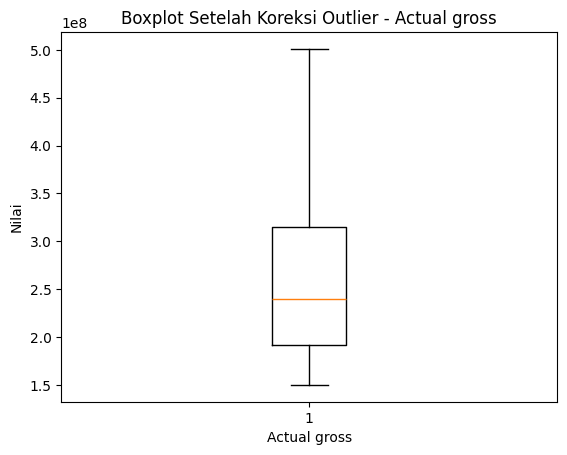

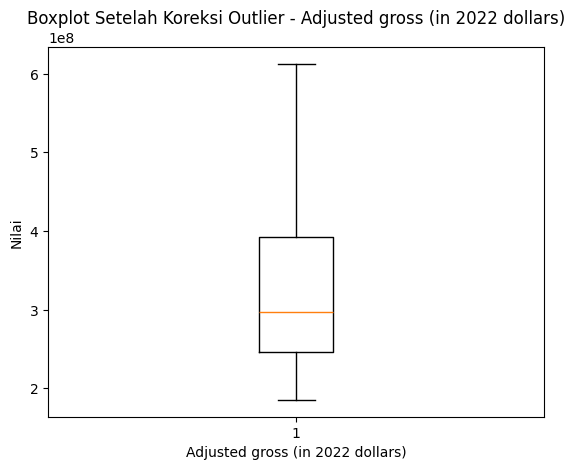

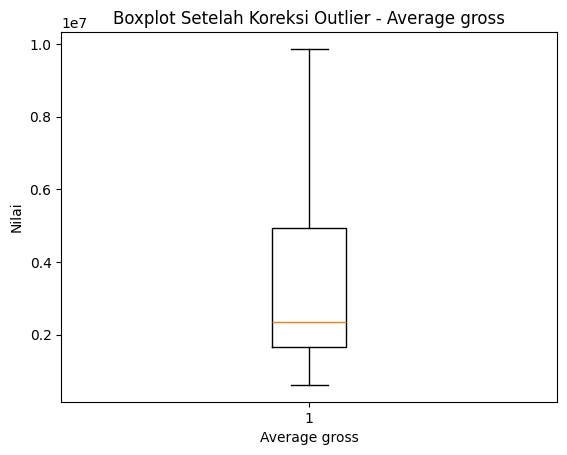

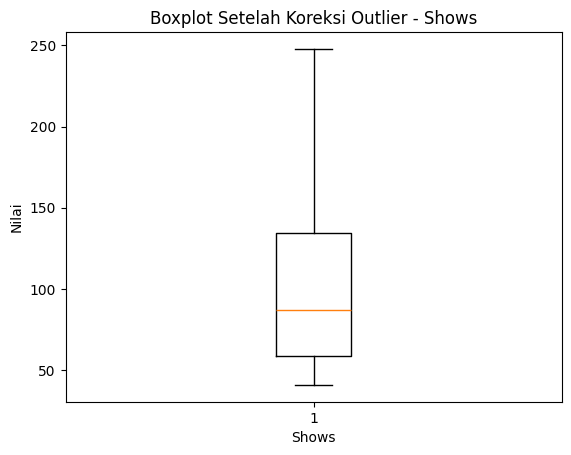

In [62]:
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot Setelah Koreksi Outlier - {col}")
    plt.xlabel(col)
    plt.ylabel("Nilai")
    plt.show()